# Importing modules and packages

In [1]:
import pandas as pd 
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

# Loading and cleaning data

In [2]:
titanic_dataset=pd.read_csv("D:/Study/AI_ML/Assignments/Day 25/train.csv")
titanic_dataset.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
titanic_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [4]:
titanic_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Encoding categorical columns

In [5]:
le=preprocessing.LabelEncoder()
titanic_dataset['Sex']=le.fit_transform(titanic_dataset['Sex'])
titanic_dataset['Embarked']=le.fit_transform(titanic_dataset['Embarked'])
titanic_dataset.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0


# Eleminating unwanted features

In [6]:
dataset1=titanic_dataset[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare','Embarked']]
parameter_list=['Survived', 'Pclass', 'Sex','SibSp','Parch','Embarked']                          

# Function

In [7]:
def naive_bayes(parameter_list):
    DV=[]
    AS=[]
    for features in parameter_list:
        y=dataset1[features]
        X=dataset1.drop([features],axis=1)
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
        clf=BernoulliNB()
        y_pred=clf.fit(X_train,y_train).predict(X_test)
        Acc_score=accuracy_score(y_test,y_pred,normalize=True)
        print(f"DV = {features} , Accuracy= {Acc_score}")
        print(confusion_matrix(y_test,y_pred))
        print("\n")
        DV.append(features)
        AS.append(Acc_score)
        
   
    df = pd.DataFrame ({'Dependent Feature':  DV, 'Accuracy Score': AS })
    return df


In [8]:
result=naive_bayes(parameter_list)
result

DV = Survived , Accuracy= 0.7715355805243446
[[131  26]
 [ 35  75]]


DV = Pclass , Accuracy= 0.5917602996254682
[[ 30   8  32]
 [  9  10  30]
 [ 24   6 118]]


DV = Sex , Accuracy= 0.7453183520599251
[[ 49  49]
 [ 19 150]]


DV = SibSp , Accuracy= 0.6891385767790262
[[162  20   0   0   0   0   0]
 [ 43  22   0   0   0   0   0]
 [  6   2   0   0   0   0   0]
 [  5   2   0   0   0   0   0]
 [  2   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0]]


DV = Parch , Accuracy= 0.7153558052434457
[[182  16   0   0   0]
 [ 31   9   0   0   0]
 [ 24   3   0   0   0]
 [  1   0   0   0   0]
 [  1   0   0   0   0]]


DV = Embarked , Accuracy= 0.7340823970037453
[[  0   0  49]
 [  0   0  22]
 [  0   0 196]]




,Dependent Feature,Accuracy Score
0,Survived,0.771536
1,Pclass,0.591760
2,Sex,0.745318
3,SibSp,0.689139
4,Parch,0.715356
5,Embarked,0.734082


# Bar Plots

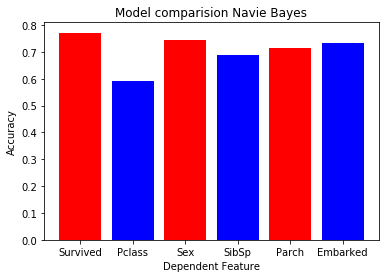

In [9]:
import matplotlib.pyplot as plt
plt.bar(result['Dependent Feature'],result["Accuracy Score"],color=["red","blue"])
plt.xlabel("Dependent Feature")
plt.ylabel("Accuracy")
plt.title("Model comparision Navie Bayes")
plt.show()

In [10]:
max = result['Accuracy Score'].max()
best_model = result.loc[result['Accuracy Score'] == max]

print(f"The best model with naive_bayes alogrithm is generated for DV as {best_model['Dependent Feature'].to_string(index = False)} with a model accuracy of {best_model['Accuracy Score'].to_string(index = False)}")



The best model with naive_bayes alogrithm is generated for DV as  Survived with a model accuracy of  0.771536
